In [1]:
import numpy as np
import matplotlib.pyplot as plt
from face_load import load_data
from convnet import ConvNet
from optimizer import *

from sklearn.utils import shuffle

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

X_train, y_train = X_train[:20000], y_train[:20000]
X_test, y_test = X_test[:5000], y_test[:5000]

network = ConvNet(input_shape=(1,50,50), conv_num=2,
                  conv_param=[{'filter_num':32, 'filter_size':7, 'pad':0, 'stride':1, 'pool_size':2},
                              {'filter_num':64, 'filter_size':5, 'pad':0, 'stride':1, 'pool_size':2}],
                  hidden_size_list=([1024, 256, 64]), output_size=2, weight_init_std=0.01)

train_acc_list = []
test_acc_list = []
train_loss_list = []

iters_num = 800
train_size = X_train.shape[0]
batch_size = 100

iter_per_epoch = int(max(train_size/batch_size, 1))
max_epoch = iters_num / iter_per_epoch

load_param = False
training = True

optimizer = Adam()
network.model()

Conv1: (32, 1, 7, 7)
Conv2: (64, 32, 5, 5)
Affine1: (5184, 1024)
Affine2: (1024, 256)
Affine3: (256, 64)
Affine4: (64, 2)


In [3]:
if load_param:
    network.load_params('saved_params_face_20_5_8000_100.pkl')
    
if training:
    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        X_batch = X_train[batch_mask]
        y_batch = y_train[batch_mask]

        grads = network.gradient(X_batch, y_batch)

        optimizer.update(network.params, grads)

        train_loss = network.loss(X_batch, y_batch)
        train_loss_list.append(train_loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(X_batch, y_batch)
            test_batch = np.random.choice(X_test.shape[0], batch_size)
            test_acc = network.accuracy(X_test[test_batch], y_test[test_batch])
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("\nEpoch: " + str(int(i//iter_per_epoch)+1) +
                  "/"+str(int(max_epoch))+"| train acc, test acc: " + str(train_acc) + ", " + str(test_acc))
            count = 1

        print("\rtrain loss({}/{}): {}".format(count, int(iter_per_epoch), str(train_loss)),end="")
        count += 1


    print("\n===== Final train, test acc: " + str(network.accuracy(X_train[:1000], y_train[:1000]))
          + ", " + str(network.accuracy(X_test[:1000], y_test[:1000])) + " =====")

    network.save_params("saved_params_face_{}_{}_{}_{}2.pkl"
                        .format(X_train.shape[0]//1000, X_test.shape[0]//1000, iters_num, batch_size))


Epoch: 1/4| train acc, test acc: 0.54, 0.66
train loss(200/200): 0.24061338443338057
Epoch: 2/4| train acc, test acc: 0.91, 0.9
train loss(200/200): 0.12320304091838828
Epoch: 3/4| train acc, test acc: 0.96, 0.93
train loss(200/200): 0.12817245525968818
Epoch: 4/4| train acc, test acc: 0.92, 0.95
train loss(200/200): 0.052601991583366196
===== Final train, test acc: 0.949, 0.94 =====
params save complete!


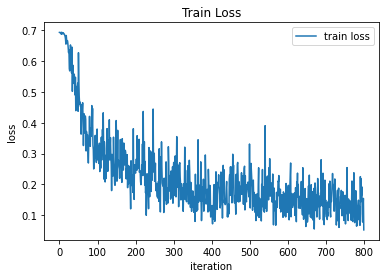

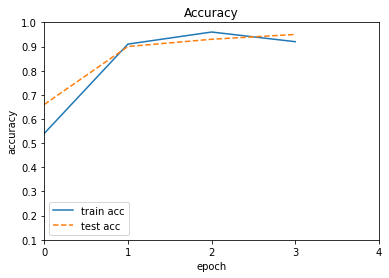

In [4]:
if training:
    plt.plot(train_loss_list[:], '-')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('Train Loss')
    plt.legend(['train loss'])
    plt.show()

    plt.plot(train_acc_list[:], '-')
    plt.plot(test_acc_list[:], '--')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.ylim(0.1, 1)
    plt.xlim(0, max_epoch)
    plt.xticks(range(0, int(max_epoch)+1, max(1, int(max_epoch//10))))
    plt.title('Accuracy')
    plt.legend(['train acc', 'test acc'])
    plt.show()